## Machine Learning with Python: Predicting Diabetes using the Pima Indian Diabetes Dataset

### Objective:
Use Machine Learning to process and transform Pima Indian Diabetes data to create a prediction model. This model must predict which people are likely to develop diabetes with > 70% accuracy (i.e. accuracy in the confusion matrix).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# render the plot inline, instead of in a separate window
%matplotlib inline

# Load data


In [2]:
df = pd.read_csv("./data/pima-data.csv")

In [3]:
df.shape # take a look at the shape; row column bagitle

(768, 10)

In [4]:
df.head(5) # take a look at the first and last few lines; col heading read kele


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)#; shevat shevt ch read kela


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [ ]:
# We want to eliminate columns that are:
#     1. no values
#     2. not used
#     3. duplicates
#     4. correlated columns

## Check for null values

In [6]:
df.isnull().values.any() #looks like we don't have any nulls; check for null values

False

## Check for correlated columns

Text(0.5, 1.0, 'Correlation Heatmap')

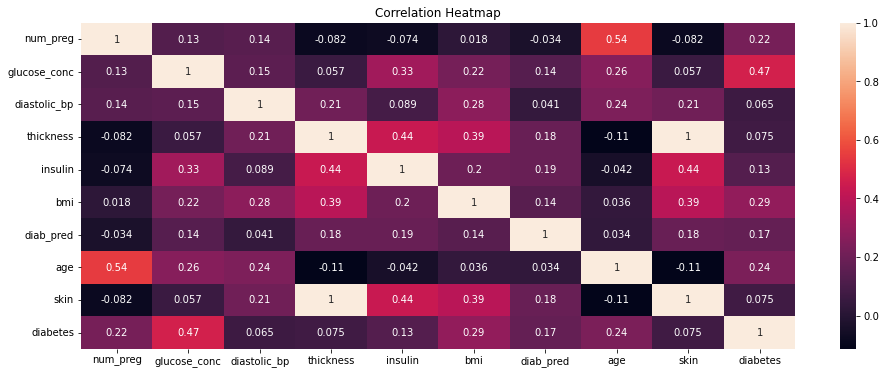

In [8]:
import seaborn as sns
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(),annot=True)
heatmap.set_title('Correlation Heatmap')

In [10]:
# looks like skin and thickness are highly correlated. Let's check the exact numbers for correlation
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [ ]:
# skin and thickness has correlation of 1! So we can remove one of them. I'll remove the skin column here.

In [11]:
del df['skin']

In [12]:
# check if it's been removed
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [13]:
df.shape # colinearity eliminated

(768, 9)

## Molding the data: 
* Adjusting data types
* Adding new columns as required

## Check Data Types


In [14]:
df.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
diabetes           bool
dtype: object

The Diabetes column is boolean function. We should vectorize it: change True to 1, False to 0 by using mapping

In [15]:
diabetes_map = {True:1, False:0}

In [16]:
df['diabetes']=df['diabetes'].map(diabetes_map)

Check that the Diabetes column has been replaced by 1 and 0

In [17]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's check if we have enough information in the dataset to build a model (i.e. is there enough people who have diabetes to provide the base for the modeling?)

## Check true/false ratio

In [18]:
num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In this dataset there is ~35% of cases where the instances have diabetes. Good distribution of true and false cases, so no more work is needed

## Selecting the algorithm


Which algorithm we'll select depends on the following criteria:
1. Learning type: supervised vs. non-supervised
2. Result: Regressison vs. Classification
3. Complexity
4. Basic vs. enhanced

Our selection criteria are:
* Supervised
* Supports binary classification
* Not-ensemble problems (we'll use that for model tuning later)

Potential algorithms:
1. <b>Naive Bayes</b>
    * Based on likelihood and probability
    * Every feature has the same weight (i.e. 'naive')
    * Requires a smaller amount of data to train  
    
    
2. <b>Logistic Regression</b>
    * Gives binary results
    * Features are weighted  
    
    
3. <b>Decision Tree</b>
    * Binary Tree
    * Nodes contains decision
    * Requires a lot of data to train, and is a bit slower  


We'll use <b>Naive Bayes</b> for this model.


## Splitting the data 

Use scikit-learn to split: 70% for training data, 30% for testing data


In [19]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values # these are factors for the prediction
y = df[predicted_class_names].values # this is what we want to predict

split_test_size = 0.3

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state=42)
# 42 is the set.seed() equivalent in Python which generates repeatable random distribution


Checking that the split is done correctly:

In [20]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


#### Let's check to make sure that the values are distributed evenly across the training and testing data

In [21]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


## Post splitting data preparation

#### Find hidden missing values (i.e. where the row = 0)

In [22]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that one of the rows in <b>thickness</b> column is 0, which is not possible. 

Let's check how many other cells = 0 there are:

In [24]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


#### How to handle missing data:

1. Ignore them
2. Delete the rows from the dataframe
3. Replace them with other values (Imputing)
    + Options for Imputing:
        + Replace with mean/median
        + Replace with expert knowledge derived value (not feasible here)
        + Use mean imputing


#### Impute with the mean

In [66]:
df_impute = df.copy()
df_impute.drop('diabetes',axis=1,inplace=True)

In [67]:
df_impute = df.replace(0, np.nan)

In [68]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_after_impute = pd.DataFrame(imputer.fit_transform(df_impute))
df_after_impute.columns = df_impute.columns

In [69]:
df_after_impute['diabetes'] = df['diabetes']

In [70]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [71]:
df_after_impute.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.403385,121.614844,72.357552,29.068229,153.102604,32.449375,0.471876,33.240885,0.348958
std,3.036113,30.506797,12.180679,9.401574,97.960599,6.884279,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,23.000000,87.450000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,134.600000,32.250000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,34.800000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
print("# rows in dataframe {0}".format(len(df_after_impute)))
print("# rows missing glucose_conc: {0}".format(len(df_after_impute.loc[df_after_impute['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df_after_impute.loc[df_after_impute['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df_after_impute.loc[df_after_impute['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df_after_impute.loc[df_after_impute['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df_after_impute.loc[df_after_impute['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df_after_impute.loc[df_after_impute['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df_after_impute.loc[df_after_impute['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 0
# rows missing diastolic_bp: 0
# rows missing thickness: 0
# rows missing insulin: 0
# rows missing bmi: 0
# rows missing diab_pred: 0
# rows missing age: 0


In [72]:
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

x= df_after_impute[feature_col_names].values # these are factors for the prediction
Y = df_after_impute[predicted_class_names].values # this is what we want to predict

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

In [93]:
model = GaussianNB()
model.fit(x_train,Y_train.ravel())
model_train_pred = model.predict(x_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train,model_train_pred)))

Accuracy: 0.7598


In [94]:
model_predict_test=model.predict(x_test)
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(Y_test,model_predict_test)))

Accuracy:0.7316


In [74]:
from sklearn.impute import SimpleImputer

# For all readings == 0, impute with mean
fill_0 = SimpleImputer(missing_values=0,strategy="mean")

X_train= fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)


## Train the data with Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

## Test the model's accuracy with training data

In [76]:
# predict values using training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library from scikit learn
from sklearn import metrics

# check naive bayes model's accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))
print()


Accuracy: 0.7542



## Test the model's accuracy with testing data

In [77]:
nb_predict_test=nb_model.predict(X_test)

from sklearn import metrics

print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))

Accuracy:0.7359


In [ ]:
df

In [ ]:
ip = [[8,137,50,]]

In [ ]:
op = nb_model.predict(ip)
print(op)

Accuracy is `0.7542` for training model, and `0.7359` for testing model

#### Confusion Matrix for Naive Bayes

In [ ]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test)))
print("")


#### Classification Report for Naive Bayes

In [ ]:
print("Classification Report")
print("{0}".format(metrics.classification_report(y_test,nb_predict_test)))

* <b>recall</b> = true positive rate/ sensitivity = measures how well the model is predicting diabetes when the result is diabetes

#### Naive Bayes Result

Recall is `0.65`, and precision is `0.61`, lower than the objective (>70%).

#### Performance Improvement Options

1. Adjust current algorithm (e.g. including new columns)

2. Get more data or improve data (not available in Naive Bayes)

3. Imrpove training (we'll do this later)

4. Try a different algorithm


We'll try the <b>random forest</b> algorithm to improve performance

#### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=300, bootstrap=True, max_features='sqrt') 
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(max_features='sqrt', n_estimators=300)

#### Check performance on the training data using Random Forest model

In [68]:
rf_predict_train = rf_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train)))
print()

Accuracy: 1.0000



#### Check performance on the testing data using Random Forest model

In [69]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))
print()

Accuracy:0.7576



Accuracy for the training data is `0.987`, for the testing data is `0.71`

#### Confusion matrix for Random Forest

In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")

#### Classification report for Random Forest

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

#### Random Forest Result

Recall is `0.54`, and precision is `0.59`, both are lower than the Naive Bayes model.

Looks like we have an <b>overfitting</b> problem for the Random Forest model!


#### How to fix overfitting:

1. Regularization hyperparameter - differs from algorithms to algorithms, need to check the documentation on how to amend that.  


2. Cross validation  


3. Bias-variance trade-off - sacrifice perfection for better overall performance

We'll use <b>cross validation</b> later in this project.
    

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(C=0.7,random_state=42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print()
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,lr_predict_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test,lr_predict_test))

#### Logistic Regression Result
Recall is `0.55`, and precision is `0.66`, both are lower than the objective (>70%).

Let's try to improve it by changing the <b>regularization parameter</b> for logistic regression model.

In [ ]:
# This section will try C value from 0.1 to 4.9 in increments of 0.1.
# For each C-value, it will create a logistic regression and train with the train data. 
# Afterwards, it will predict the test data for the different C-values, and the highest result is recorded.

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))


# Let's plot the changes in C-values against recall scores to see how the regularization scores impact the recall score

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

## Logistic regression with class_weight="balanced"

This is to solve the fact that the classes are not balanced (i.e. there are 35% Diabetes vs. 65% No Diabetes in this dataset). 

Because it's not 50/50, unbalanced classes may yield poor prediction results.

Implementing <b>balanced weight</b> will cause a change in the predicted class boundary.

In [ ]:
# Similarly to the above section, this will try C value from 0.1 to 4.9 in increments of 0.1.
# For each C-value, it will create a logistic regression and train with the train data, with classes being balanced.
# Afterwards, it will predict the test data for the different C-values, and the highest result is recorded.

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
#     the difference here vs. the original logistic regression model is that this line below includes "class_weight='balanced'"
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))



# Plot the changes in C-values against recall scores to see how the regularization scores impact the recall score, with classes being balanced. 

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

#### Check the training metrics of logistic regression model with balanced classes

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

#### Logistic Regression with balanced weights:

Recall is `0.74`, and precision is `0.57`. Recall > 70% means that we've achieved the objective!

## K-fold Cross Validation

Tuning hyperparameters with Cross Validation

1. For each fold: Determine best hyperparameter value


2. Set model hyperparameter value to average best

Sciknit-learn has a model <b>Algorithm CV Variants</b>:  

* Algorithm + Cross Validation = AlgorithmCV 
* Ends in "CV"
* Exposes fit(),predict()....
* Runs the algorithms K times
* Can be used like normal algorithm

## Use LogisticRegressionCV to do Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

#### Use LogisticRegressionCV to predict the testing data

In [ ]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Confusion Matrix")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

#### Logistic Regression with balanced weights:

Recall is `0.68`, and precision is `0.55`. This is lower than the Logistic Regression model with balanced weight.

## Summary:

Among the models we evaluated:
    * Naive Bayes
    * Random Forest
    * Logistic Regression
    * Logistic Regression with balanced classes
    * Logistic Regression with Cross Validation

<b>Logistic Regression with balanced classes</b> seems to provide the best recall value (`0.74`). Although we also estimate that the Logistic Regression with Cross Validation model may also be more accurate for real-life data.